In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Siri N Shetty: PES2UG22CS556

* Load_data:
    * load data from csv using `\t` as the separator.
    * Drop irrelevant columns
    * Label encode
    * select the main features and make an array of values (an array of arrays)
        * Example format of this:
            * `x = data_main[['Education', 'Kidhome', 'Teenhome' ......
                   'Z_CostContact', 'Z_Revenue']].values`
    * Scalarization of the features
    * return `scaled_x` variable which is a variable containing the scaled values of x

* apply_pca:
    * return `x_pca` variable which is the set of reduced features.
    * for ideal results, use n_components as 2. Feel free to experiment with this value but n_components = 2 is ideal case.

* find_optimal_clusters:
    * this is to find the optimal number of clusters using the elbow method.
    * find the values of inertia till max_clusters+1 and append the inertia values to an array.
    * return the inertia array with `inertia` variable. `VERY IMPORTANT TO SEE THE GRAPH`

* perform_kmeans_clustering:
    * use kmeans `init = "k-means++"`, `max_iter=300`, `n_init = 10`, `random_state` is your choice and `n_clusters` is the best elbow value.
    * return the kmeans fit predict values with `y_kmeans` variable.

* perform_agglomerative_clustering:
    * Linkage method is "ward" and n_clusters is the best elbow value.
    * return the agglomerative clustering values after fit predicting the `x` feature values as `y_agglomerative` variable name.

* for dendrogram:
    * get_linkages:
        * it helps to form the linkages between x and in the 'ward' method.
        * return `linked` variable which has the linkages.
    * plot_dendrogram:
        * it is to plot the dendrogram in the (10,7) with x_label as index and y_label as distance
        * dendrogram function takes in the linkages from `get_linkages` function as the `linked` variable.

* Now, you are requested to submit screenshots of the `dengrogram, test case 1 and 2 passed messages`.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    data = pd.read_csv(filepath, sep='\t')
    data = data.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])
    label_encoders = {}
    categorical_columns = ['Education', 'Marital_Status']
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
    data.fillna(data.median(), inplace=True)
    features = data[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 
                     'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']].values
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(features)
    return scaled_x
    pass
    

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pca = PCA(n_components=n_components, random_state=42)
    x_pca = pca.fit_transform(x)
    return x_pca
    pass
    

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    inertia = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
    diffs = np.diff(inertia)
    elbow_point = np.argmin(diffs) + 2
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to find optimal clusters')
    plt.vlines(x=elbow_point, ymin=min(inertia), ymax=max(inertia), colors='r', linestyles='dashed', label='Elbow point')
    plt.legend()
    plt.show()
    return inertia, elbow_point
    pass
    

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(x)
    return y_kmeans
    pass
    

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters):
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    linkage_methods = ['ward', 'complete', 'average', 'single']
    distance_metrics = ['euclidean', 'manhattan', 'cosine']
    best_silhouette = -1
    best_y_agglomerative = None
    for linkage in linkage_methods:
        for metric in distance_metrics:
            if linkage == 'ward' and metric != 'euclidean':
                continue
            try:
                agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
                y_agglomerative = agglomerative.fit_predict(x)
                silhouette = silhouette_score(x, y_agglomerative)
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_y_agglomerative = y_agglomerative
            except:
                continue
    
    if best_silhouette < 0.5:
        for n in range(max(2, n_clusters-2), min(n_clusters+3, len(x)-1)):
            agglomerative = AgglomerativeClustering(n_clusters=n)
            y_agglomerative = agglomerative.fit_predict(x_scaled)
            silhouette = silhouette_score(x_scaled, y_agglomerative)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_y_agglomerative = y_agglomerative
    return best_y_agglomerative
    pass
    

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    return linkage(x, method='ward')
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()
    pass

# Just edit the file path here... Don't edit anything else

In [3]:
def calculate_silhouette_score(x, y_pred):
    return silhouette_score(x, y_pred)

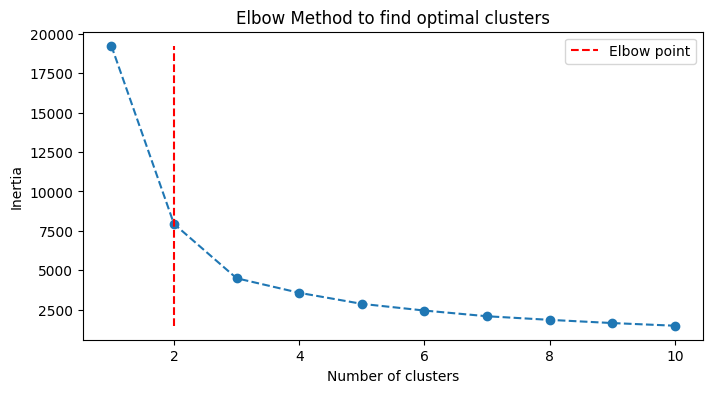

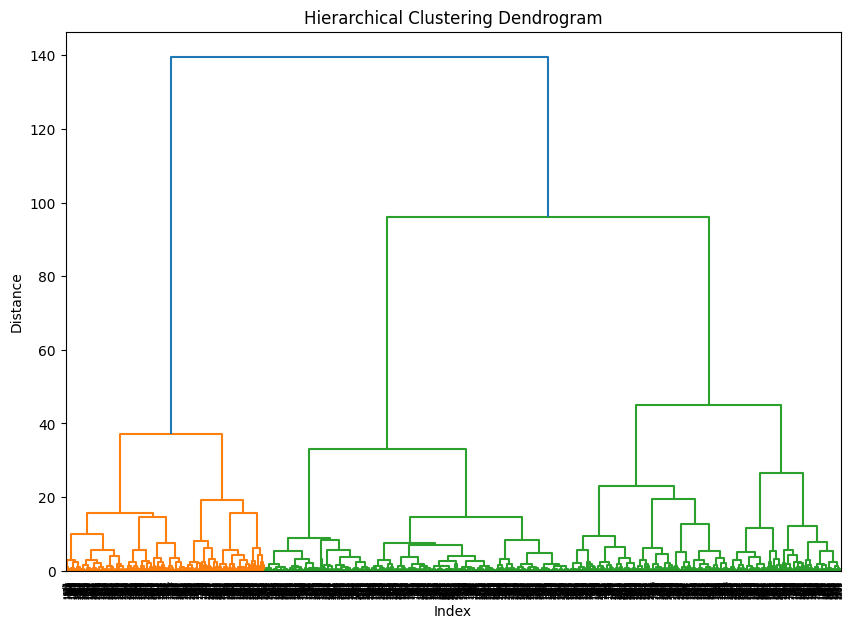

Test Case 1 passed!
Test case 2 passed!


In [4]:
def main(filepath):
    x = load_data(filepath)

    # Apply PCA for Dimensionality Reduction
    x_pca = apply_pca(x, n_components=2)
    
    # KMeans: finding optimal clusters
    inertia, optimal_clusters = find_optimal_clusters(x_pca)
    
    # KMeans clustering implementation
    y_kmeans = perform_kmeans_clustering(x_pca, optimal_clusters)
    
    # Agglomerative Clustering
    y_agglomerative = perform_agglomerative_clustering(x_pca, optimal_clusters)
    
    # Hierarchical Clustering Dendrogram
    hierarchical_linked = get_linkages(x_pca)
    
    # Plot the dendrogram for hierarchical clustering
    plot_dendrogram(hierarchical_linked)
    
    # Silhouette scores
    silhouette_kmeans = calculate_silhouette_score(x_pca, y_kmeans)
    silhouette_agglomerative = calculate_silhouette_score(x_pca, y_agglomerative)
    
    # Return results
    return {
        "inertia": inertia,
        "silhouette_kmeans": silhouette_kmeans,
        "silhouette_agglomerative": silhouette_agglomerative,
        "agglomerative_clustering": y_agglomerative,
        "hierarchical_linked": hierarchical_linked,
        "pca_components": x_pca
    }

# %%
# Call the main function and print silhouette scores and dendrogram
result = main("marketing_campaign.csv")


# Silhouette scores checks 
if result['silhouette_kmeans'] >= 0.5:
    print("Test Case 1 passed!")
if result['silhouette_agglomerative'] >= 0.5:
    print("Test case 2 passed!")